In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import feature
from scipy.misc import imread
import os
import argparse
import glob

%matplotlib inline

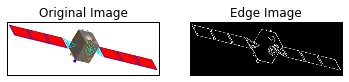

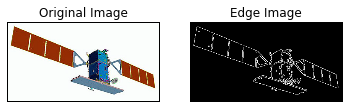

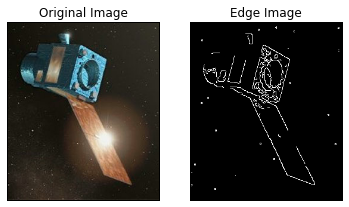

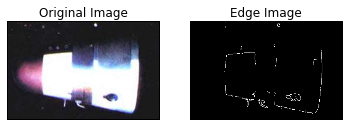

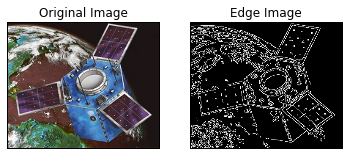

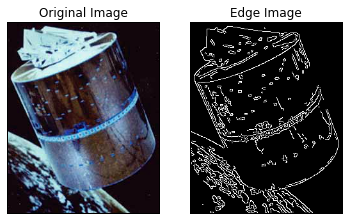

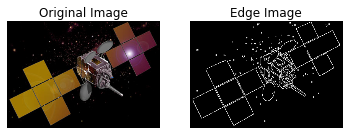

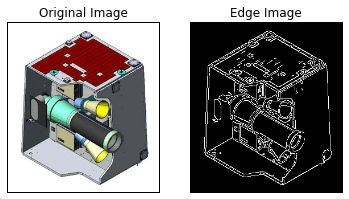

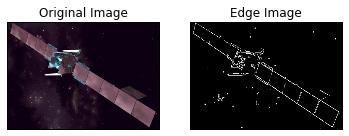

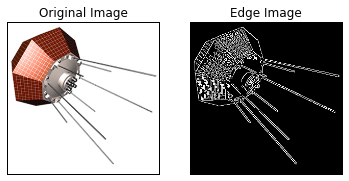

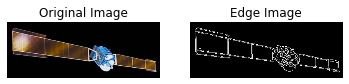

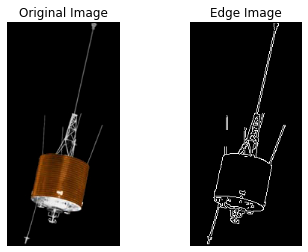

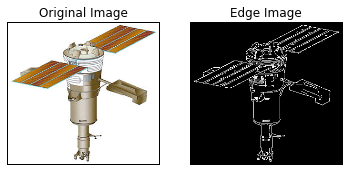

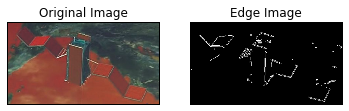

In [2]:
for f in os.listdir('./test_data/'):
    img = cv2.imread('./test_data/' + f)
    edges = cv2.Canny(img, 200,300)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

In [3]:
(_, cnts, _) = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [4]:
maxlen = 0
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) > maxlen:
        screenCnt = approx
        maxlen = len(approx)

In [5]:
# cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
# cv2.imshow("Game Boy Screen", img)
# cv2.waitKey(0)

In [6]:
# gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# _,contours,hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# idx = 0 
# for cnt in contours:
#     idx += 1
#     x,y,w,h = cv2.boundingRect(cnt)
#     roi=img[y:y+h,x:x+w]
#     cv2.imwrite(str(idx) + '.jpg', roi)
#     #cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
# cv2.imshow('img',img)
# cv2.waitKey(0)    

In [7]:
img = cv2.imread('./test_data/skynet-5a__1.jpg')

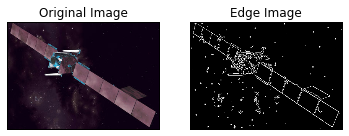

In [8]:
edges = cv2.Canny(img,30,200)
# edges = feature.canny(img[:,:,2],100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

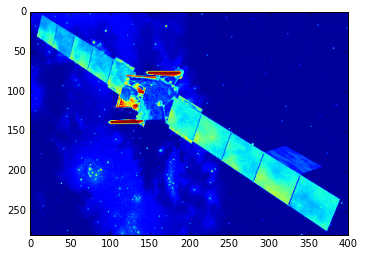

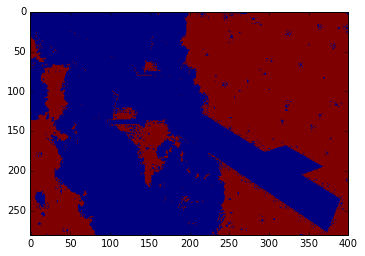

In [9]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # grayscale
_,thresh = cv2.threshold(gray,10,255,cv2.THRESH_BINARY_INV) # threshold
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

plt.imshow(gray)
plt.show()
plt.imshow(thresh)
plt.show()

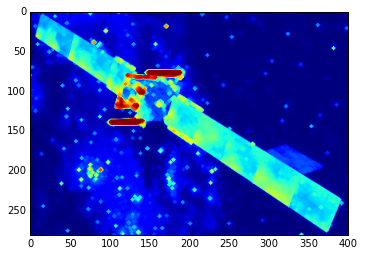

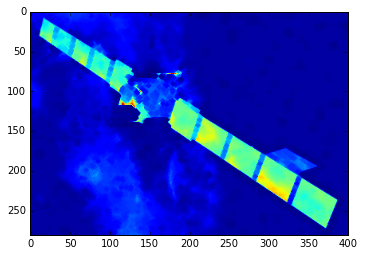

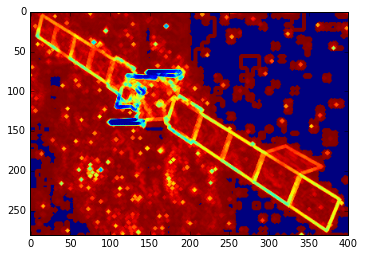

In [10]:
dilated = cv2.dilate(gray, kernel, iterations = 2) # dilate
# _, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours
_, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours

plt.imshow(dilated)
plt.show()

dilated2 = cv2.erode(gray, kernel, iterations = 3) # dilate
# _, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours
plt.imshow(dilated2)
plt.show()

plt.imshow(dilated2-dilated)
plt.show()

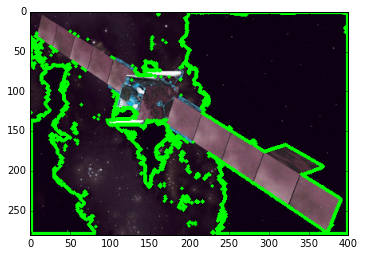

In [11]:
# for each contour found, draw a rectangle around it on original image
for ind,contour in enumerate(contours):
    # get rectangle bounding contour
    [x,y,w,h] = cv2.boundingRect(contour)

#     # discard areas that are too large
#     if h>300 and w>300:
#         continue

#     # discard areas that are too small
#     if h<40 or w<40:
#         continue

    # draw rectangle around contour on original image
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
    
    if hierarchy[0][ind][3] == -1:
        cv2.drawContours(img, [contour], -1, (0, 255, 0), 3)
    
   
    
# write original image with added contours to disk  
# cv2.imwrite("contoured.jpg", img) 
plt.imshow(img)
plt.show()

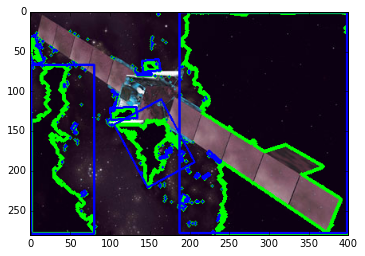

In [12]:
for c in contours:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    im = cv2.drawContours(img,[box],0,(0,0,255),2)
plt.imshow(im)
plt.show()

In [13]:
len(contours)

173

In [14]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

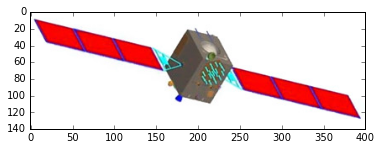

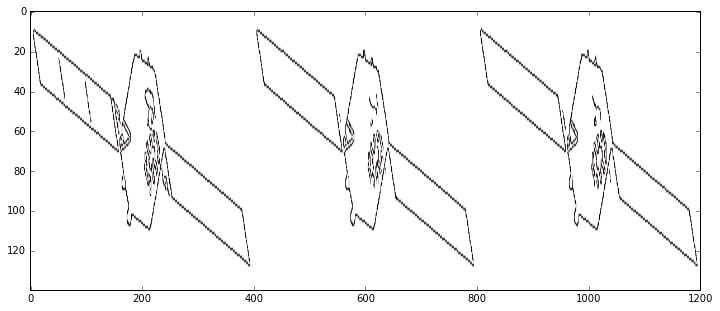

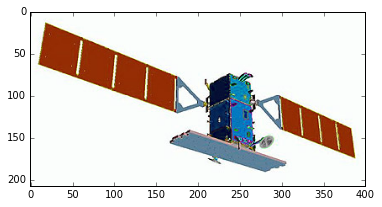

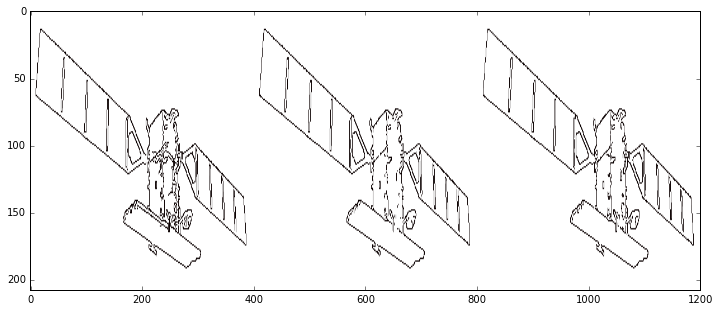

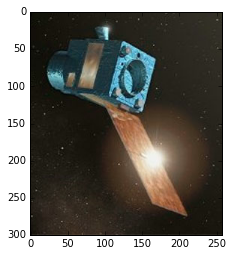

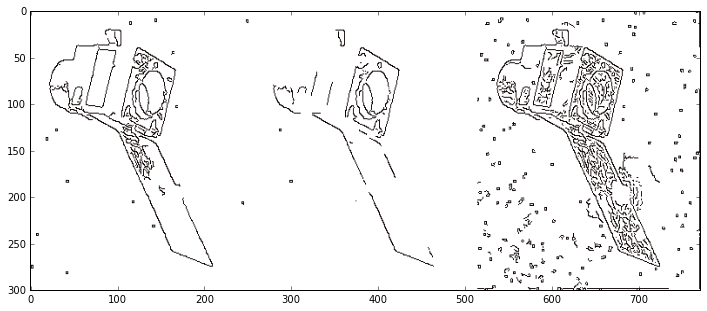

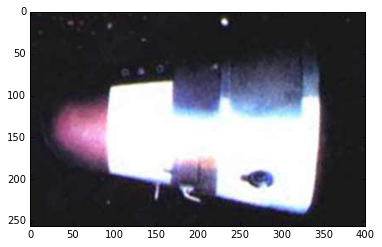

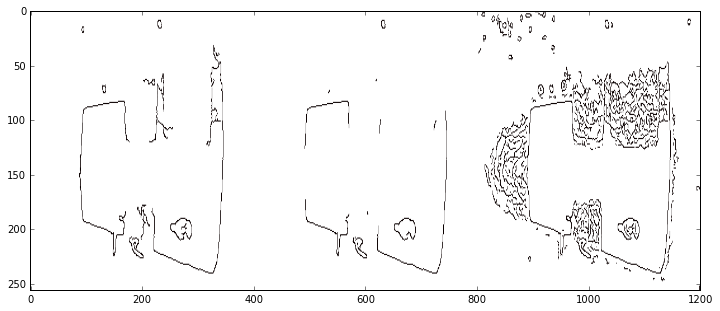

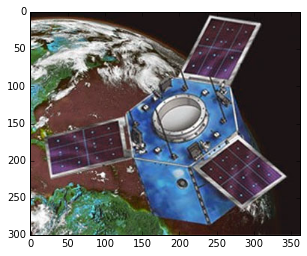

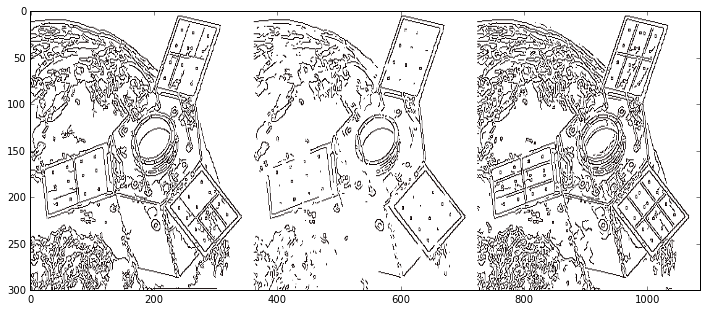

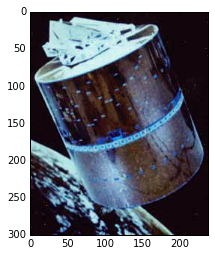

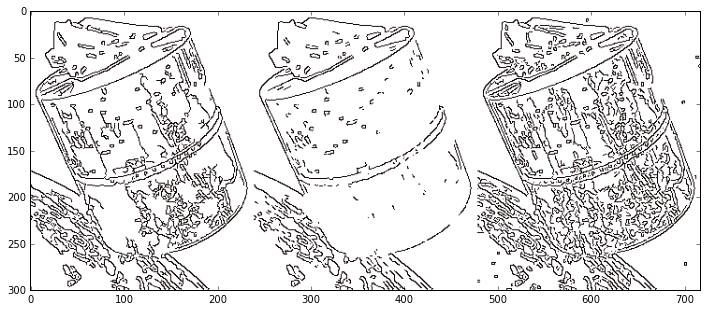

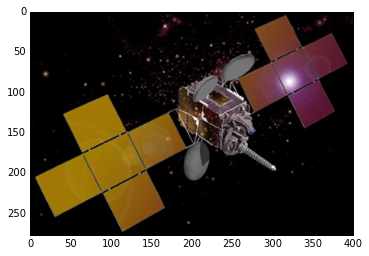

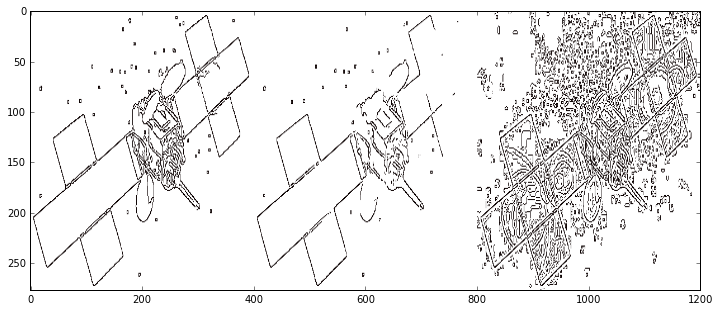

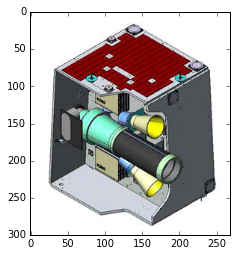

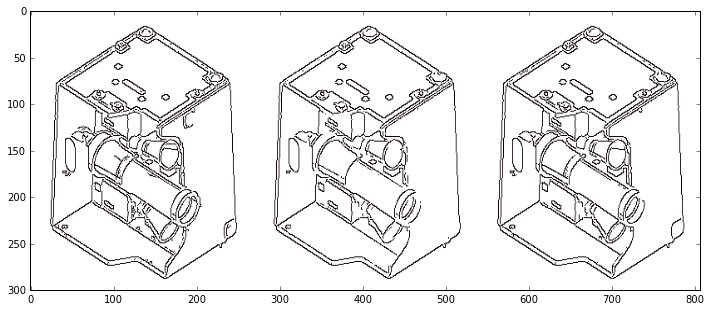

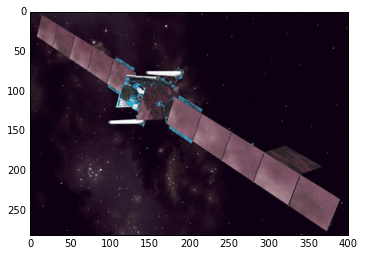

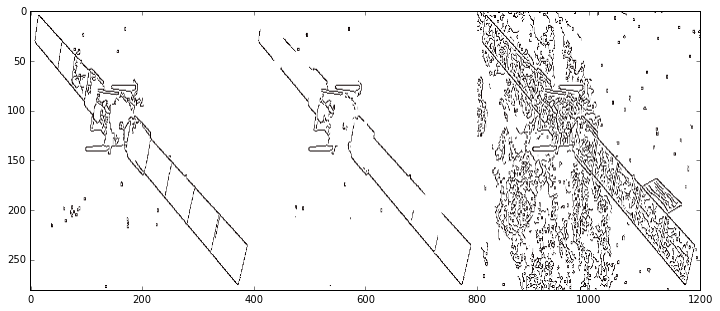

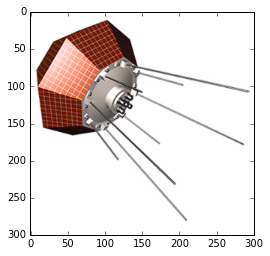

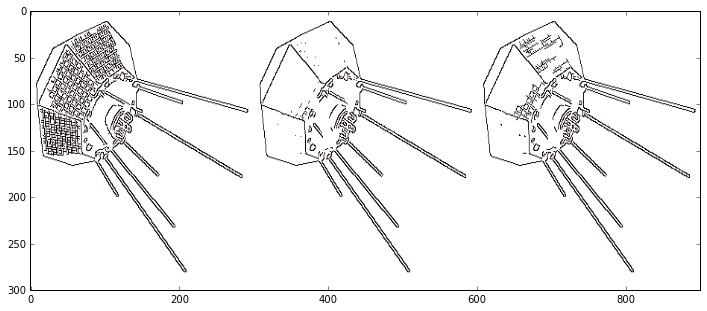

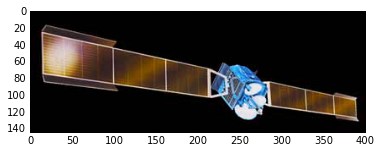

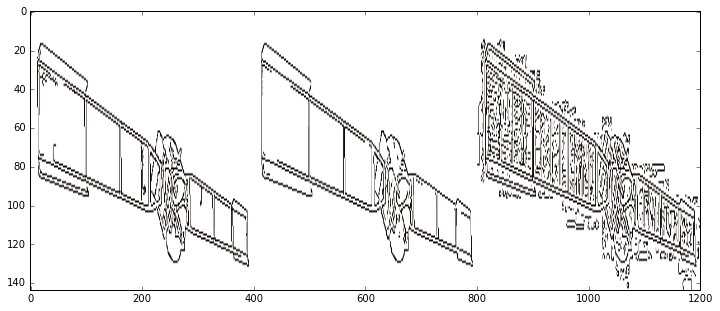

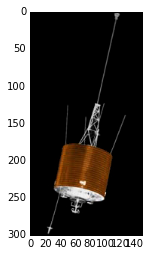

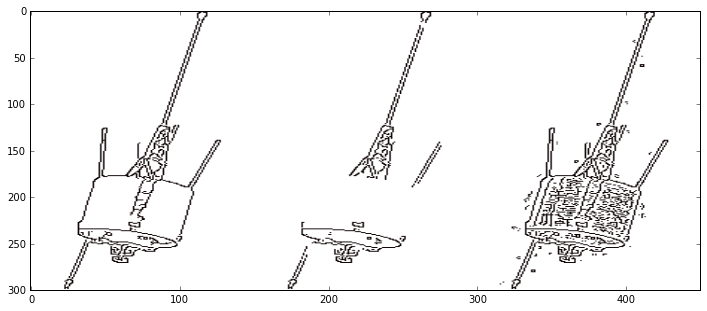

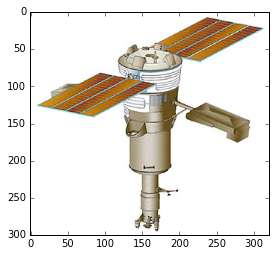

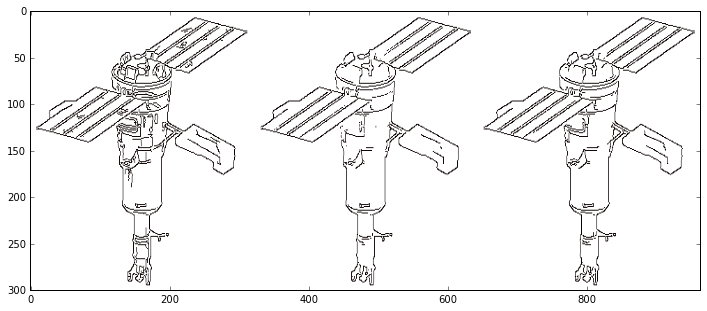

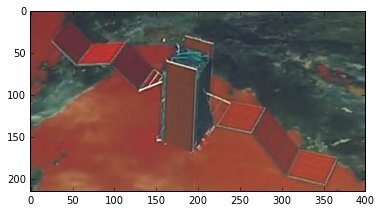

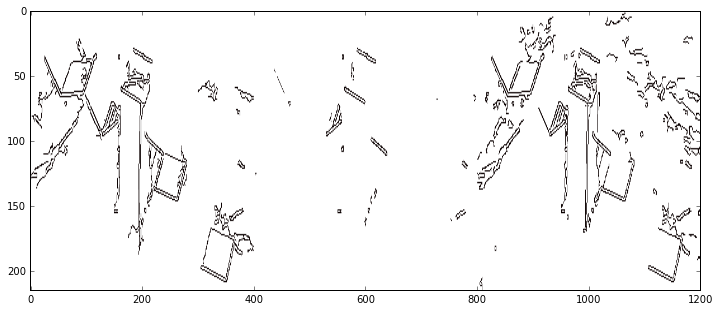

In [15]:
for f in os.listdir('./test_data/'):
    image = cv2.imread('./test_data/' + f)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # apply Canny edge detection using a wide threshold, tight
    # threshold, and automatically determined threshold
    wide = cv2.Canny(blurred, 10, 200)
    tight = cv2.Canny(blurred, 225, 250)
    auto = auto_canny(blurred)

    # show the images
    plt.imshow(image)
    plt.show()
    fig = plt.figure(figsize=(12,5))
    plt.imshow(np.hstack([wide, tight, auto]), aspect='auto', cmap='hot_r')
    plt.show()
#     cv2.waitKey(0)